<a href="https://colab.research.google.com/github/Abungo/Abungo/blob/main/abungo_breastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [30]:
url = "https://raw.githubusercontent.com/Abungo/copypaste/main/breastCancer.csv"
df=pd.read_csv(url)

In [31]:
X = df.iloc[:,2:-1]
y = df.iloc[:,1]

In [32]:
en = LabelEncoder()
en.fit(y)
y = en.transform(y)

In [33]:
#scaling the training data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=3, test_size = 0.25)

In [35]:
model = Sequential()
model.add(Dense(16,input_dim = 30, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
model.add(Dense(1,input_dim = 30,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [36]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, verbose=2)

Epoch 1/50
14/14 - 1s - loss: 0.7782 - accuracy: 0.6080 - val_loss: 0.6156 - val_accuracy: 0.6643 - 829ms/epoch - 59ms/step
Epoch 2/50
14/14 - 0s - loss: 0.5658 - accuracy: 0.7183 - val_loss: 0.4683 - val_accuracy: 0.7832 - 79ms/epoch - 6ms/step
Epoch 3/50
14/14 - 0s - loss: 0.4257 - accuracy: 0.8263 - val_loss: 0.3706 - val_accuracy: 0.8741 - 74ms/epoch - 5ms/step
Epoch 4/50
14/14 - 0s - loss: 0.3402 - accuracy: 0.8850 - val_loss: 0.3067 - val_accuracy: 0.8951 - 74ms/epoch - 5ms/step
Epoch 5/50
14/14 - 0s - loss: 0.2866 - accuracy: 0.9131 - val_loss: 0.2637 - val_accuracy: 0.9231 - 107ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.2507 - accuracy: 0.9225 - val_loss: 0.2316 - val_accuracy: 0.9301 - 93ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.2237 - accuracy: 0.9390 - val_loss: 0.2070 - val_accuracy: 0.9441 - 100ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.2028 - accuracy: 0.9437 - val_loss: 0.1874 - val_accuracy: 0.9441 - 97ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0

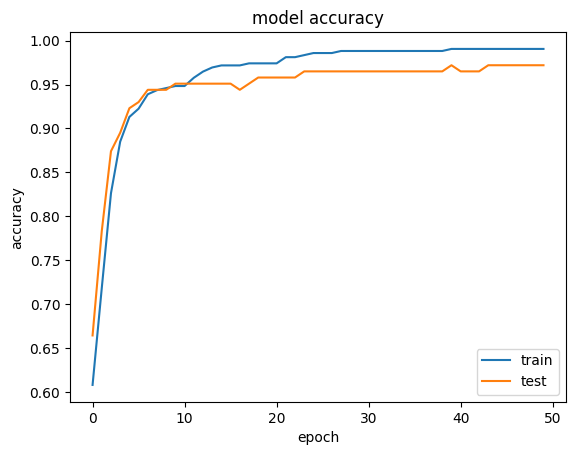

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

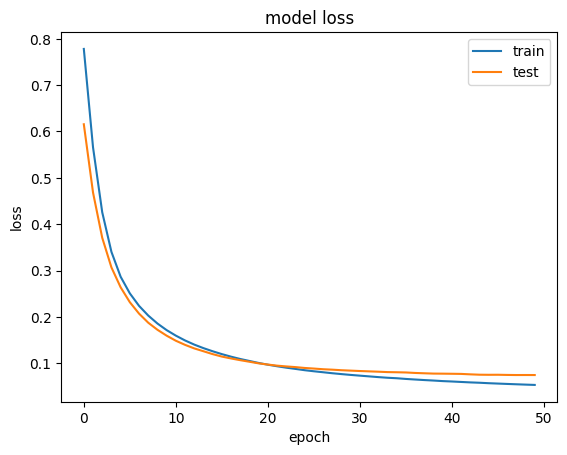

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper right')
plt.show()

In [39]:
y_pred = model.predict(X_test)
y_pred_n = y_pred >= 0.5

5/5 [==============================] - 0s 3ms/step


In [40]:
confusion_mat = confusion_matrix(y_test,y_pred_n)
confusion_mat

array([[88,  2],
       [ 2, 51]])

In [41]:
result = classification_report(y_test,y_pred_n)
print()
print("Classification Results")
print(result)


Classification Results
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

